### Proyecto Final de Grado: Clasificador de Objetos de Escritorio

### Inferencia sobre nuevas imágenes usando el modelo entrenado

### Alumna: Alejandra Pérez Quintana

Este notebook carga el modelo entrenado y realiza predicciones sobre nuevas imágenes de prueba para comprobar su rendimiento.

# 1. Librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import cv2

c:\Users\Alejandra\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# 2. Cargar el modelo entrenado

In [2]:
model_path = 'models/modelo_multiclase.h5'

assert os.path.exists(model_path), "No se encuentra el modelo entrenado en 'models/modelo_multiclase.h5'"

model = load_model(model_path)
print("Modelo cargado correctamente.")

Modelo cargado correctamente.


# 3. Definición de etiquetas de clases

In [3]:
class_labels = ['monitor', 'teclado', 'raton', 'taza', 'libro', 'movil']

# 4. Umbral de confianza para clasificar como "No es de escritorio"

In [4]:
umbral_confianza = 0.6

# 6. Función para predecir imagenes nuevas

In [5]:
def predict_image(img_path):
    """
    Realiza la predicción con el modelo y muestra las dos clases más probables y sus confianzas.
    Si la confianza más alta es menor al umbral, se clasifica como "No es de escritorio".
    """
    # Umbral ajustado
    confidence_threshold = 0.5

    # Cargar la imagen y preprocesar
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Realizar la predicción
    prediction = model.predict(img_array)[0]

    # Obtener las dos clases más probables
    top_2_indices = prediction.argsort()[-2:][::-1]
    top_2_confidences = prediction[top_2_indices]
    top_2_classes = [class_labels[i] for i in top_2_indices]

    # Determinar la clase predicha o "No es de escritorio"
    if top_2_confidences[0] < confidence_threshold:
        predicted_class = "No es un objeto de escritorio"
    else:
        predicted_class = top_2_classes[0]

    # Mostrar la imagen y las predicciones
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"1. {top_2_classes[0]} ({top_2_confidences[0]:.2f})\n2. {top_2_classes[1]} ({top_2_confidences[1]:.2f})")
    plt.show()

    print(f"Imagen: {img_path}")
    print(f"1. Predicción: {top_2_classes[0]} - Confianza: {top_2_confidences[0]:.2f}")
    print(f"2. Predicción: {top_2_classes[1]} - Confianza: {top_2_confidences[1]:.2f}")

    # Mostrar si ninguna predicción supera el umbral
    if top_2_confidences[0] < confidence_threshold:
        print(f"⚠️ La imagen {img_path} no es reconocida como un objeto de escritorio.")

# 7. Hacer predicciones sobre imágenes nuevas

## 7.1 Ruta a la carpeta de imágenes de prueba

In [6]:
test_images_dir = 'imagenes_prueba/'

## 7.2 Lista de imágenes

In [7]:
test_images = os.listdir(test_images_dir)

## 7.3 Predicciones con imágenes nuevas no vistas durante el entrenamiento


Predicción para la imagen: libro1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


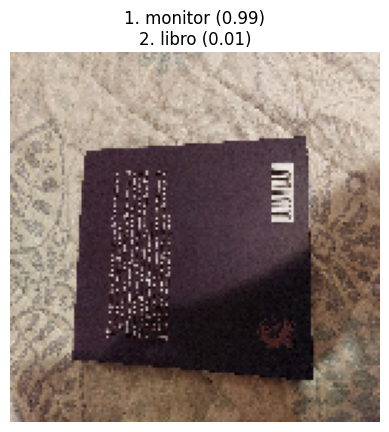

Imagen: imagenes_prueba/libro1.jpg
1. Predicción: monitor - Confianza: 0.99
2. Predicción: libro - Confianza: 0.01

Predicción para la imagen: libro2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


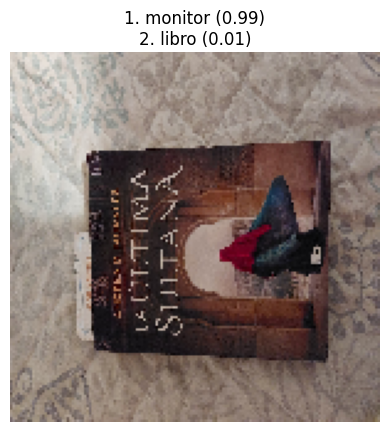

Imagen: imagenes_prueba/libro2.jpg
1. Predicción: monitor - Confianza: 0.99
2. Predicción: libro - Confianza: 0.01

Predicción para la imagen: libro3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


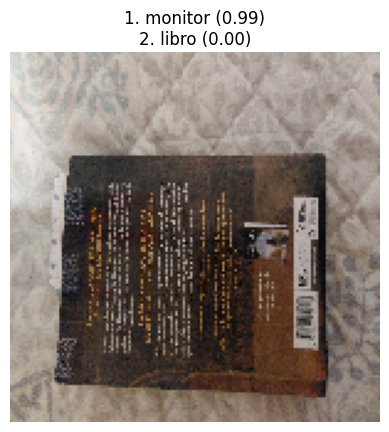

Imagen: imagenes_prueba/libro3.jpg
1. Predicción: monitor - Confianza: 0.99
2. Predicción: libro - Confianza: 0.00

Predicción para la imagen: libro4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


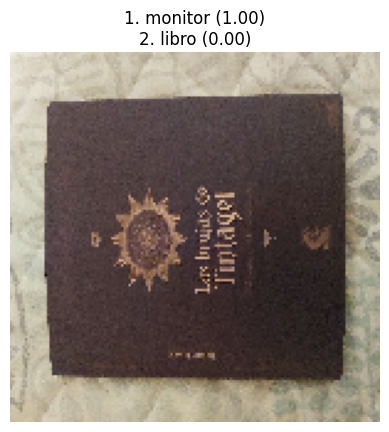

Imagen: imagenes_prueba/libro4.jpg
1. Predicción: monitor - Confianza: 1.00
2. Predicción: libro - Confianza: 0.00

Predicción para la imagen: libro5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


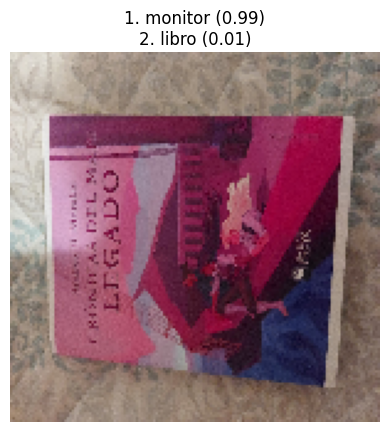

Imagen: imagenes_prueba/libro5.jpg
1. Predicción: monitor - Confianza: 0.99
2. Predicción: libro - Confianza: 0.01

Predicción para la imagen: monitor1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


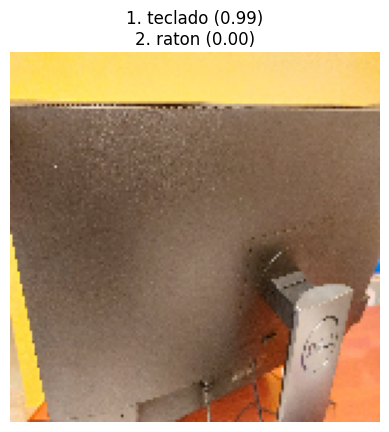

Imagen: imagenes_prueba/monitor1.jpg
1. Predicción: teclado - Confianza: 0.99
2. Predicción: raton - Confianza: 0.00

Predicción para la imagen: monitor2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


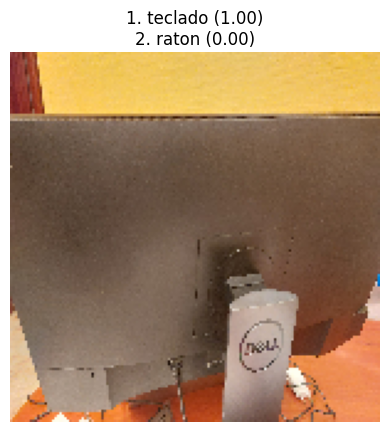

Imagen: imagenes_prueba/monitor2.jpg
1. Predicción: teclado - Confianza: 1.00
2. Predicción: raton - Confianza: 0.00

Predicción para la imagen: monitor3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


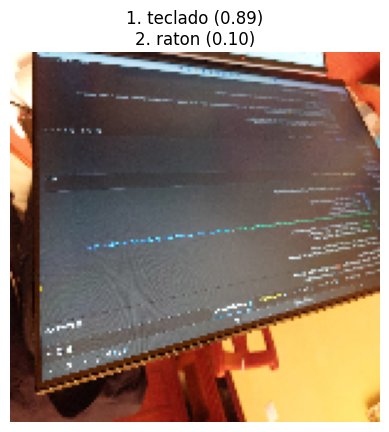

Imagen: imagenes_prueba/monitor3.jpg
1. Predicción: teclado - Confianza: 0.89
2. Predicción: raton - Confianza: 0.10

Predicción para la imagen: monitor4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


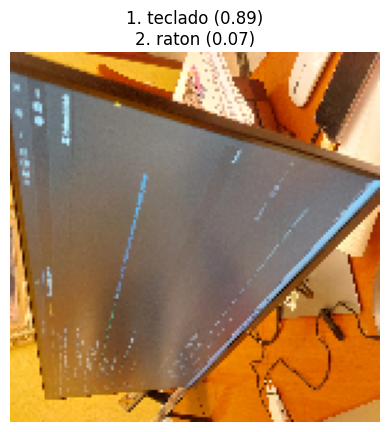

Imagen: imagenes_prueba/monitor4.jpg
1. Predicción: teclado - Confianza: 0.89
2. Predicción: raton - Confianza: 0.07

Predicción para la imagen: monitor5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


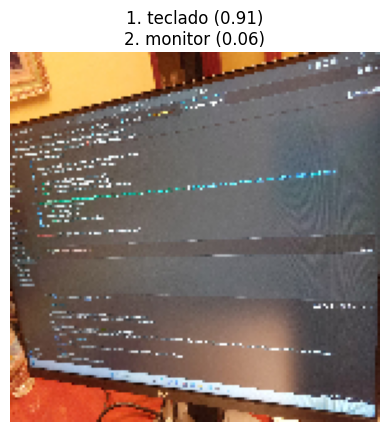

Imagen: imagenes_prueba/monitor5.jpg
1. Predicción: teclado - Confianza: 0.91
2. Predicción: monitor - Confianza: 0.06

Predicción para la imagen: movil1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


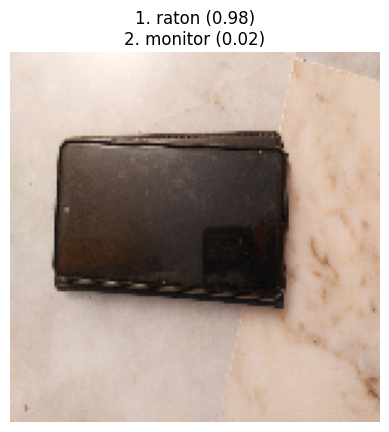

Imagen: imagenes_prueba/movil1.jpg
1. Predicción: raton - Confianza: 0.98
2. Predicción: monitor - Confianza: 0.02

Predicción para la imagen: movil2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


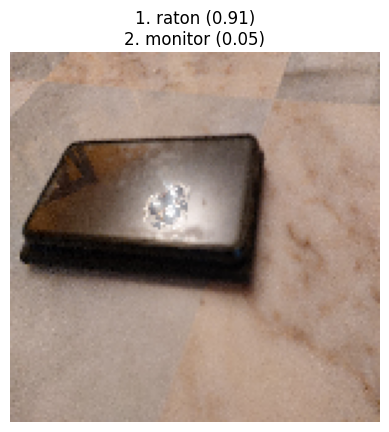

Imagen: imagenes_prueba/movil2.jpg
1. Predicción: raton - Confianza: 0.91
2. Predicción: monitor - Confianza: 0.05

Predicción para la imagen: movil3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


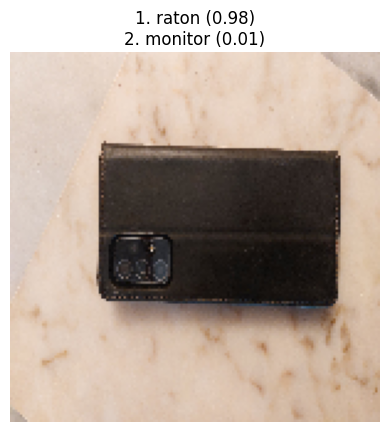

Imagen: imagenes_prueba/movil3.jpg
1. Predicción: raton - Confianza: 0.98
2. Predicción: monitor - Confianza: 0.01

Predicción para la imagen: movil4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


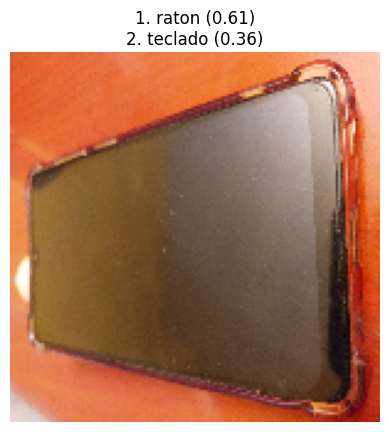

Imagen: imagenes_prueba/movil4.jpg
1. Predicción: raton - Confianza: 0.61
2. Predicción: teclado - Confianza: 0.36

Predicción para la imagen: movil5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


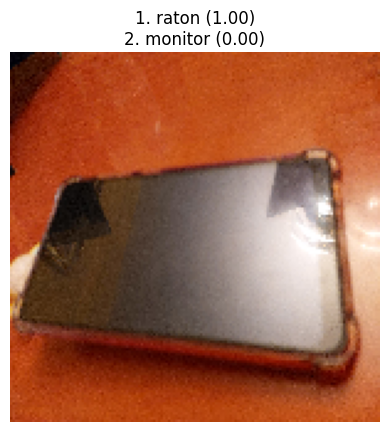

Imagen: imagenes_prueba/movil5.jpg
1. Predicción: raton - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: no_escritorio1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


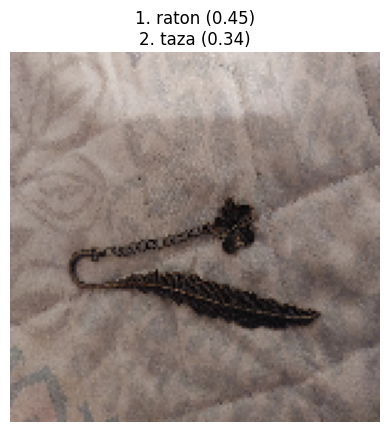

Imagen: imagenes_prueba/no_escritorio1.jpg
1. Predicción: raton - Confianza: 0.45
2. Predicción: taza - Confianza: 0.34
⚠️ La imagen imagenes_prueba/no_escritorio1.jpg no es reconocida como un objeto de escritorio.

Predicción para la imagen: no_escritorio2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


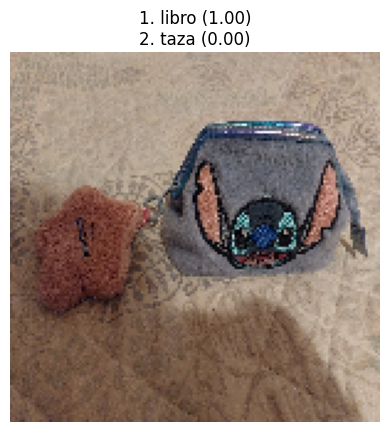

Imagen: imagenes_prueba/no_escritorio2.jpg
1. Predicción: libro - Confianza: 1.00
2. Predicción: taza - Confianza: 0.00

Predicción para la imagen: no_escritorio3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


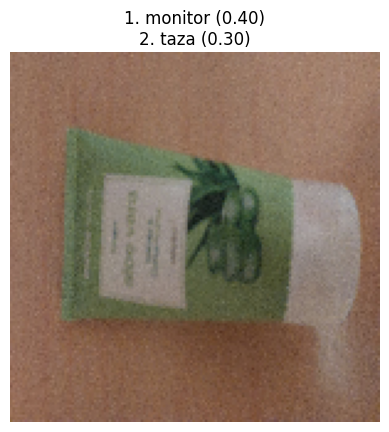

Imagen: imagenes_prueba/no_escritorio3.jpg
1. Predicción: monitor - Confianza: 0.40
2. Predicción: taza - Confianza: 0.30
⚠️ La imagen imagenes_prueba/no_escritorio3.jpg no es reconocida como un objeto de escritorio.

Predicción para la imagen: no_escritorio4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


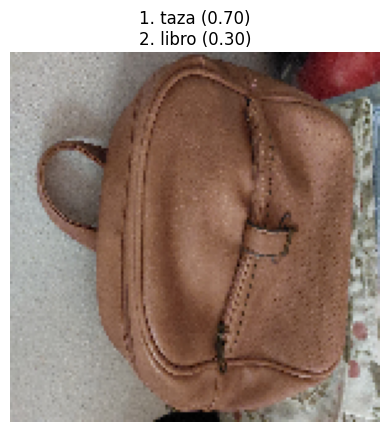

Imagen: imagenes_prueba/no_escritorio4.jpg
1. Predicción: taza - Confianza: 0.70
2. Predicción: libro - Confianza: 0.30

Predicción para la imagen: no_escritorio5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


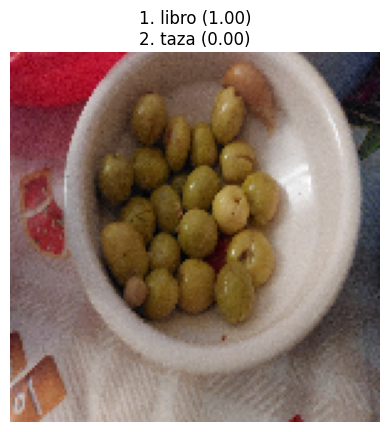

Imagen: imagenes_prueba/no_escritorio5.jpg
1. Predicción: libro - Confianza: 1.00
2. Predicción: taza - Confianza: 0.00

Predicción para la imagen: no_escritorio6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


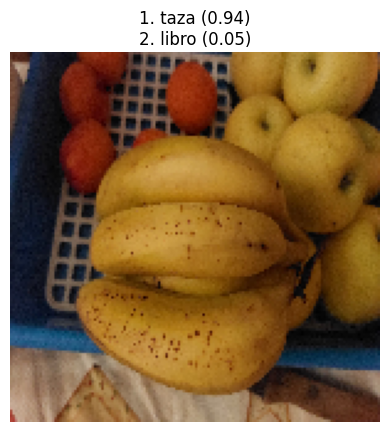

Imagen: imagenes_prueba/no_escritorio6.jpg
1. Predicción: taza - Confianza: 0.94
2. Predicción: libro - Confianza: 0.05

Predicción para la imagen: raton1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


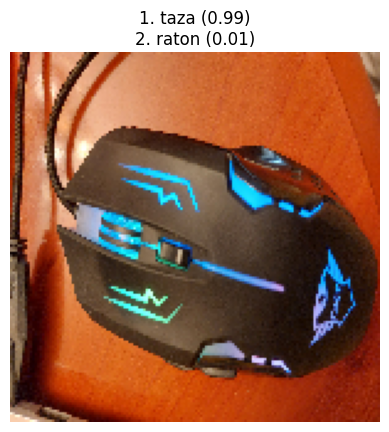

Imagen: imagenes_prueba/raton1.jpg
1. Predicción: taza - Confianza: 0.99
2. Predicción: raton - Confianza: 0.01

Predicción para la imagen: raton2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


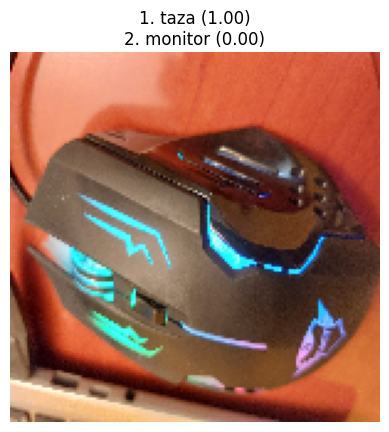

Imagen: imagenes_prueba/raton2.jpg
1. Predicción: taza - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: raton3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


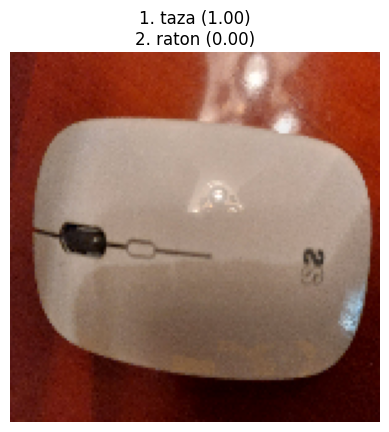

Imagen: imagenes_prueba/raton3.jpg
1. Predicción: taza - Confianza: 1.00
2. Predicción: raton - Confianza: 0.00

Predicción para la imagen: raton4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


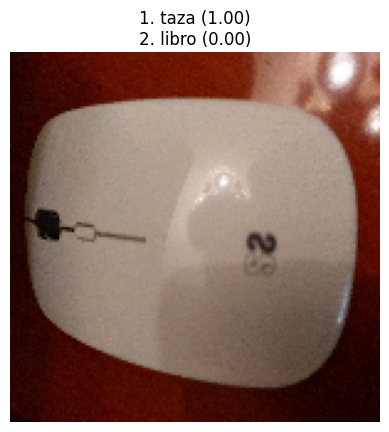

Imagen: imagenes_prueba/raton4.jpg
1. Predicción: taza - Confianza: 1.00
2. Predicción: libro - Confianza: 0.00

Predicción para la imagen: raton5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


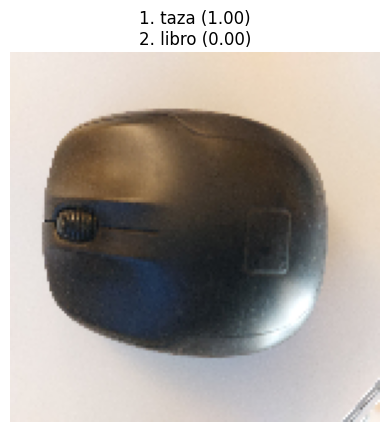

Imagen: imagenes_prueba/raton5.jpg
1. Predicción: taza - Confianza: 1.00
2. Predicción: libro - Confianza: 0.00

Predicción para la imagen: taza1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


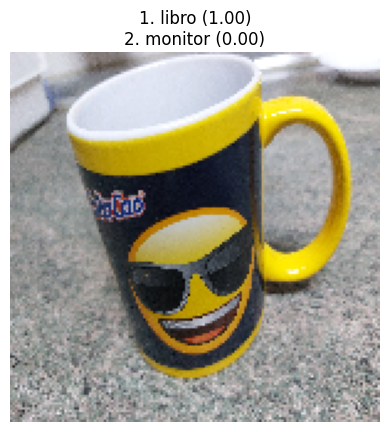

Imagen: imagenes_prueba/taza1.jpg
1. Predicción: libro - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: taza2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


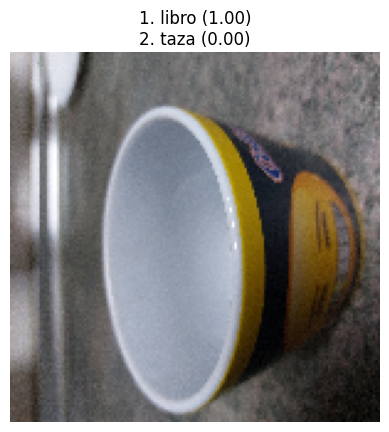

Imagen: imagenes_prueba/taza2.jpg
1. Predicción: libro - Confianza: 1.00
2. Predicción: taza - Confianza: 0.00

Predicción para la imagen: taza3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


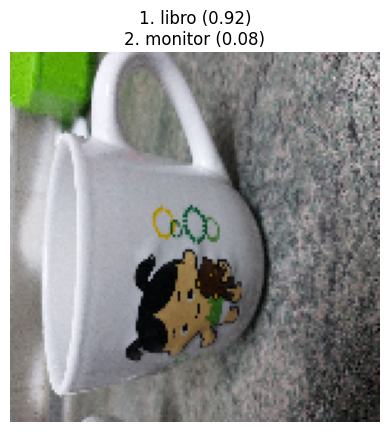

Imagen: imagenes_prueba/taza3.jpg
1. Predicción: libro - Confianza: 0.92
2. Predicción: monitor - Confianza: 0.08

Predicción para la imagen: taza4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


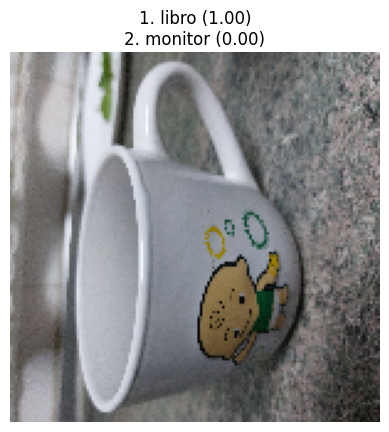

Imagen: imagenes_prueba/taza4.jpg
1. Predicción: libro - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: taza5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


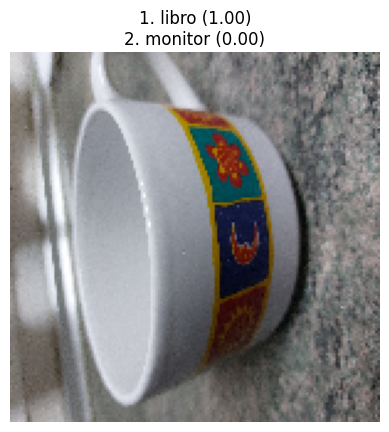

Imagen: imagenes_prueba/taza5.jpg
1. Predicción: libro - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: teclado1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


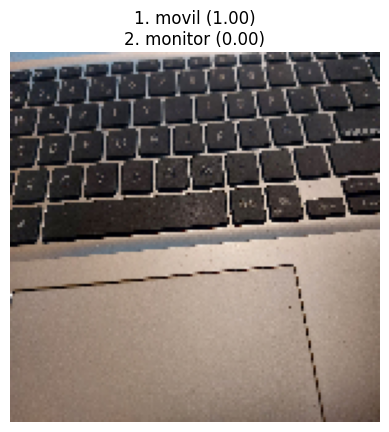

Imagen: imagenes_prueba/teclado1.jpg
1. Predicción: movil - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: teclado2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


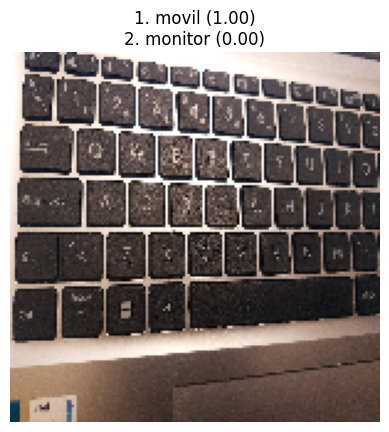

Imagen: imagenes_prueba/teclado2.jpg
1. Predicción: movil - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: teclado3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


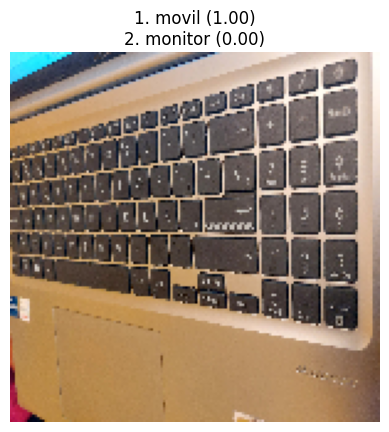

Imagen: imagenes_prueba/teclado3.jpg
1. Predicción: movil - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: teclado4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


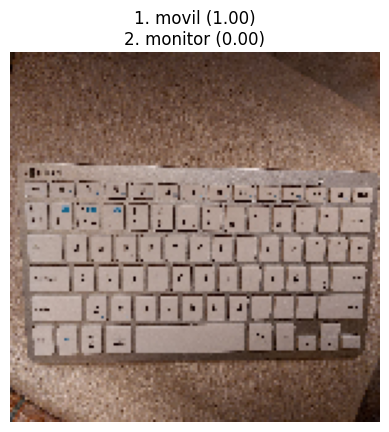

Imagen: imagenes_prueba/teclado4.jpg
1. Predicción: movil - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00

Predicción para la imagen: teclado5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


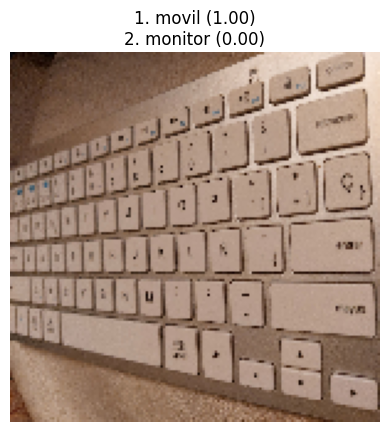

Imagen: imagenes_prueba/teclado5.jpg
1. Predicción: movil - Confianza: 1.00
2. Predicción: monitor - Confianza: 0.00


In [8]:
# Verificar que hay imágenes en la carpeta
if len(test_images) == 0:
    print("No se encontraron imágenes en la carpeta 'imagenes_prueba'.")
else:
    # Realizar predicciones en todas las imágenes
    for img_name in test_images:
        img_path = os.path.join(test_images_dir, img_name)
        print(f"\nPredicción para la imagen: {img_name}")
        
        # Función para predecir y mostrar la imagen
        try:
            predict_image(img_path)
        except Exception as e:
            print(f"Error al procesar {img_name}: {e}")